In [6]:
# imports needed for the exercises

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector,plot_histogram
from qiskit_aer import AerSimulator
from qiskit.quantum_info import random_statevector
from qiskit.extensions import Initialize
import math


Exercise 1: Program a 1-qubit quantum circuit outputting a superposition state 1/√2 (|0⟩+|1⟩). 
Visualize the circuit and the final quantum state in the Bloch sphere.
Tips use 'QuantumCircuit', 'Statevector' and ' evolve'


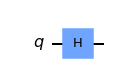

In [3]:
# Define your circuit using 'QuantumCircuit'

qc = QuantumCircuit(1)

# Add a H gate on qubit '0', putting this qubit in superposition.

qc.h(0)

#  plot the circuit

qc.draw('mpl')

In [4]:
# Define your initial state using 'Statevector'

state=Statevector([1,0])

state.draw('latex')

<IPython.core.display.Latex object>

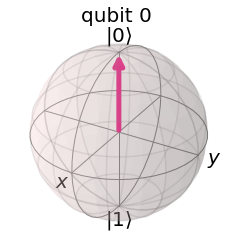

In [5]:
#plot the intial state in the Bloch sphere

plot_bloch_multivector(state)

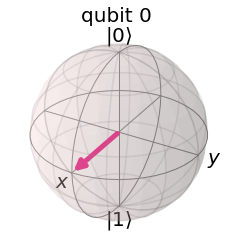

In [6]:
# obtain the state after the quantum circuit using evolve

finalstate = state.evolve(qc)

#plot the final state in the Bloch sphere

plot_bloch_multivector(finalstate)


Exercise 2: Program a 2-qubit quantum circuit generating the entangled state 1/√2 (|00⟩+|11⟩). 
Visualize the circuit and the state. Is it possible to visualize the initial state for each qubit in the Bloch sphere?
If not, use the ‘qsphere’ representation.


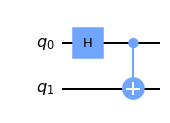

In [9]:
#define the quantum circuit

qc = QuantumCircuit(2)

#add the H and CX gates

qc.h(0)
qc.cx(0,1)

# plot the circuit

qc.draw('mpl')

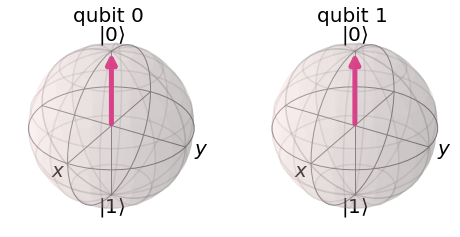

In [10]:
state= Statevector.from_int(0,2**2)

plot_bloch_multivector(state)


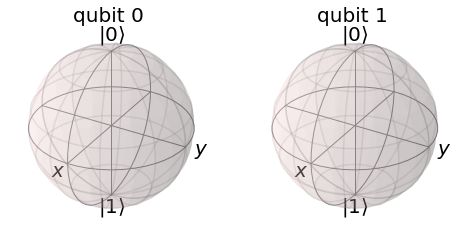

In [11]:
# obtain the state after the quantum circuit using evolve

finalstate = state.evolve(qc)

#plot the final state in the Bloch sphere

plot_bloch_multivector(finalstate)

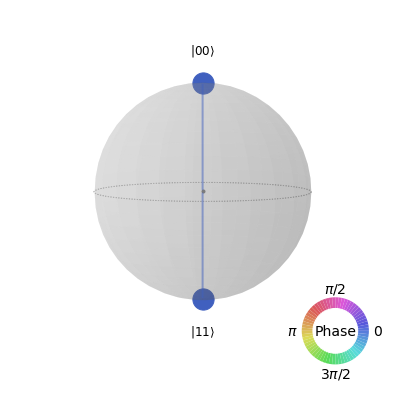

In [12]:
#plot in the IBM qsphere

finalstate.draw('qsphere')


Exercise 3: Program a quantum circuit including a 3-qubit quantum register and a 3- bit classical register
so that the final state is |100⟩. Include a measurement for all qubits and send the results through classical registers. 
Visualize the final state both in the Bloch sphere and in the qsphere. 
Compile the circuit and plot the result of the measurements in a histogram.


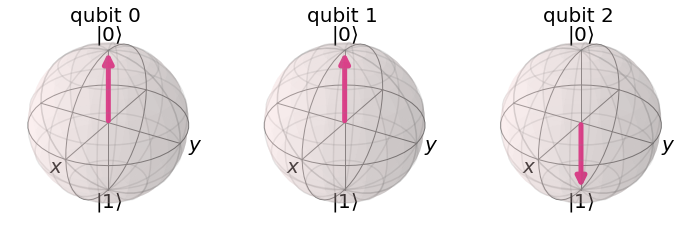

In [23]:
# define the circuit

qc = QuantumCircuit(3,3)

# define the initial state

state = Statevector.from_int(0, 2**3)

# add the gates

qc.x(2)

# evolve the state through the circuit

finalstate= state.evolve(qc)

# plot the state in the Bloch sphere

plot_bloch_multivector(finalstate)

#finalstate.draw('latex')

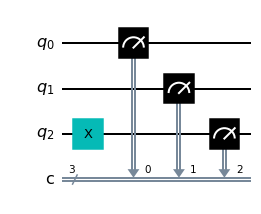

In [22]:
# measure the three qubits and store the result of the measurement in the three classical bits

#qc.measure([0,1,2],[0,1,2])

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

# plot the circuit

qc.draw('mpl')


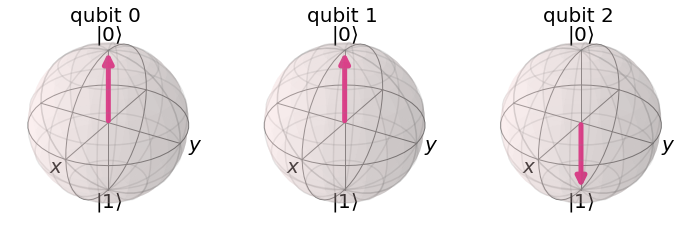

In [183]:
# run the simulation

qc.save_statevector()

sim = AerSimulator()

compiled_circuit = transpile(qc, sim)

job=sim.run(compiled_circuit)

out_vector = job.result().get_statevector()

#plot the out_vector

#out_vector.draw('qsphere')

plot_bloch_multivector(out_vector)

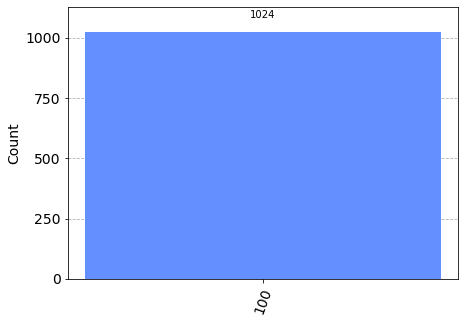

In [184]:
result = job.result()

counts = result.get_counts()

# plot the instogram

plot_histogram(counts)


Exercise 4: Program a quantum circuit with a 1-qubit quantum register and also one classical register. 
Generate a random superposition state |𝜓⟩ and visualize it in the Bloch sphere. 
Initialize your quantum circuit with the random state. 
Run the simulation and visualize the output state in the Bloch sphere, and the count’s histogram. 


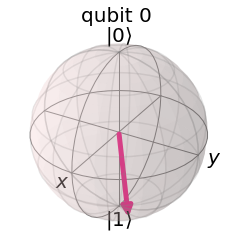

In [24]:
# Create random 1-qubit state psi using random_statevector

psi = random_statevector(2)

# Show it in the Bloch sphere

#psi.draw('latex')

plot_bloch_multivector(psi)


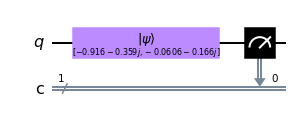

In [188]:
#define the quantum circuit

qc = QuantumCircuit(1,1) 

#initialize the circuit with the random state

init_gate = Initialize(psi)

qc.append(init_gate, [0])

# measure the state and store the result in the classical bit.

qc.measure(0,0)

# show the circuit including the measurement

qc.draw('mpl')

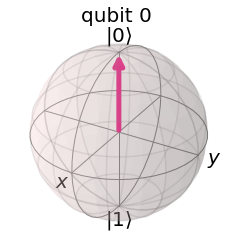

In [189]:
qc.save_statevector()

#run the simulation (see previous exercise)

sim = AerSimulator()

compiled_circuit = transpile(qc, sim)

job=sim.run(compiled_circuit)

out_vector = job.result().get_statevector()

# display the out_vecor

plot_bloch_multivector(out_vector)



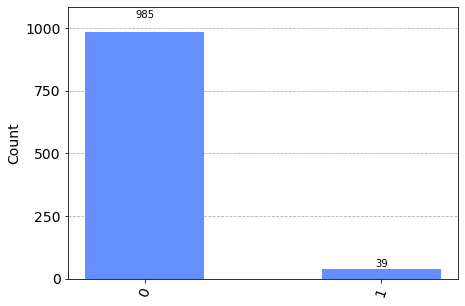

In [190]:
#show the counts histogram

result = job.result()

counts = result.get_counts()

# plot the instogram

plot_histogram(counts)




Exercise 5: read the detailed instructions in the exercise sheet



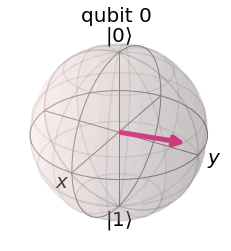

In [219]:
# Define a random quantum state and show it in the Bloch sphere

psi = random_statevector(2)

plot_bloch_multivector(psi)


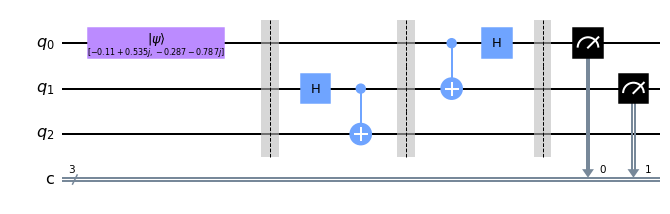

In [220]:
# Define the circuit displayed in the exercise sheet (including all gates) and show it

teleportation_circuit = QuantumCircuit(3,3)

#qr = QuantumRegister(3)
#cr = ClassicalRegister(3)

#teleportation_circuit = QuantumCircuit(qr,cr)

#teleportation_circuit.draw('mpl')

init_gate = Initialize(psi)

teleportation_circuit.append(init_gate,[0])

teleportation_circuit.barrier()

teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)

teleportation_circuit.barrier()

teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)

teleportation_circuit.barrier()

teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)

teleportation_circuit.draw('mpl')



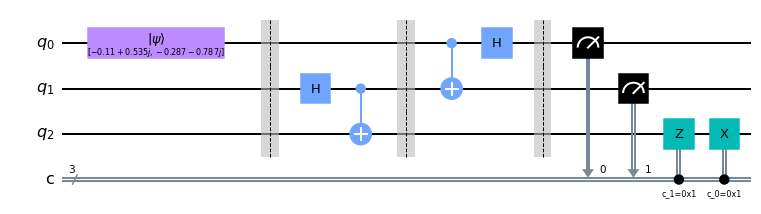

In [221]:
# include the conditional gates

teleportation_circuit.z(2).c_if(1,1)
teleportation_circuit.x(2).c_if(0,1) 
 
# show the circuit including the gates

teleportation_circuit.draw('mpl')


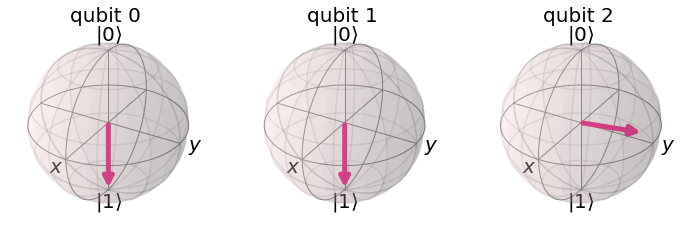

In [222]:
teleportation_circuit.save_statevector()

#run the simulation and show the out_vector, is teleportation achieved?

sim = AerSimulator()

compiled_circuit = transpile(teleportation_circuit, sim)

job=sim.run(compiled_circuit)

out_vector = job.result().get_statevector()

# display the out_vecor

plot_bloch_multivector(out_vector)


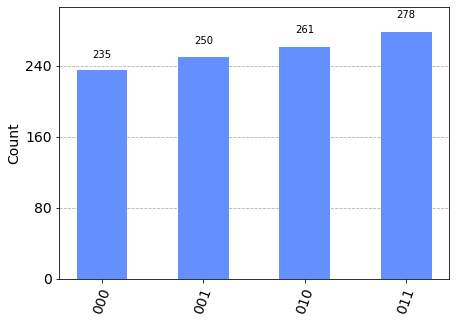

In [223]:
#show the instogram

result = job.result()

counts = result.get_counts()

# plot the instogram

plot_histogram(counts)



COMMENT: 

The histogram shows the results of the three bits after all measurements. Bit 2 is always zero as we 
we did not perform any measurement on that one and for the other two, the ones we measured, we obtain same probability for
all four possible measurement results 00 01 10 and 11.

Indeed it if we define just two bits (QuantumCircuit(3,2)) - you will derive the same information from the instogram.

